# Import what we need
### matplotlib inline

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load MNIST Dataset

In [2]:
(train_val_data, train_val_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

### check shapes and types

In [3]:
train_val_data.shape, train_val_data.dtype, train_val_data.min(), train_val_data.max()

((60000, 28, 28), dtype('uint8'), 0, 255)

In [4]:
train_val_labels.shape, train_val_labels.dtype, train_val_labels.min(), train_val_labels.max()

((60000,), dtype('uint8'), 0, 9)

### check shapes and types of test data

In [5]:
test_data.shape, test_data.dtype, test_data.min(), test_data.max()

((10000, 28, 28), dtype('uint8'), 0, 255)

### now lets plot some images

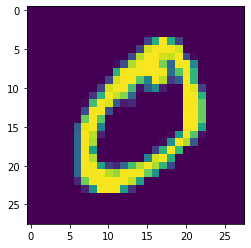

In [6]:
plt.imshow(train_val_data[1])

In [7]:
train_val_labels[1]

0

# Reshape train and test data

In [8]:
train_val_data = np.reshape(train_val_data, (-1, 28 * 28))
test_data = np.reshape(test_data, (-1, 28 * 28))

In [9]:
train_val_data.shape, test_data.shape

((60000, 784), (10000, 784))

# Convert labels to one-hot encoding
### essential for classification - use to_categorical

In [10]:
# 0 - 9
# 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# one-hot

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_val_labels = to_categorical(train_val_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

### now see new one-hot labels

In [13]:
train_val_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [56]:
tf.argmax(train_val_labels[0]).numpy()

5

In [14]:
train_val_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Convert test labels as well

# Normalize the data
### between 0 and 1 and float32 dtype

In [15]:
train_val_data = train_val_data.astype(np.float32) / 255.
test_data = test_data.astype(np.float32) / 255.

# or / 127.5 - 1.

### check mean, min, max of data

In [16]:
train_val_data.min(), train_val_data.max(), test_data.min(), test_data.max()

(0.0, 1.0, 0.0, 1.0)

In [17]:
train_val_data.dtype

dtype('float32')

## last final check of all shapes

In [18]:
# compatible shapes with our neural network
# normalize between 0 and 1 or -1 and +1
# dtype = float32

In [19]:
train_val_data.shape, train_val_data.dtype

((60000, 784), dtype('float32'))

In [20]:
test_data.shape, test_data.dtype

((10000, 784), dtype('float32'))

In [21]:
train_val_labels.shape, train_val_labels.dtype

((60000, 10), dtype('float32'))

In [22]:
##

## Use some portion of data if you want

In [23]:
train_data = train_val_data[:30000]
train_labels = train_val_labels[:30000]
val_data = train_val_data[30000:40000]
val_labels = train_val_labels[30000:40000]

In [24]:
train_data.shape, val_data.shape

((30000, 784), (10000, 784))

# Create Our Classification Model

### Import layers and models

In [128]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

## Create the model

In [129]:
input_layer = Input((784, ))

x = Dense(units=512, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
# x = Dropout(0.2)(x)
x = Dense(units=256, activation="relu", kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
x = Dense(units=128, activation="relu", kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
output = Dense(units=10, activation="sigmoid", kernel_regularizer=l2(0.001))(x)

classification_model = Model(input_layer, output)

### print summary of the model

In [130]:
classification_model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# Compile the model
## With optimizer and loss function
## This time we use another metric as well

In [131]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [132]:
classification_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                             loss="categorical_crossentropy", metrics=["accuracy"])

## Now we can train the model

In [133]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True, mode="max")

In [134]:
classification_model.fit(x=train_data, y=train_labels, batch_size=64, epochs=40,
                         validation_data=(val_data, val_labels), callbacks=[early_stop])
# Generalization Deep Learning

Epoch 1/40
469/469 [==============================] - 2s 5ms/step - loss: 1.6530 - accuracy: 0.8381 - val_loss: 1.2722 - val_accuracy: 0.9257
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 1.1363 - accuracy: 0.9410 - val_loss: 1.0513 - val_accuracy: 0.9438
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.9480 - accuracy: 0.9592 - val_loss: 0.9006 - val_accuracy: 0.9557
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.8095 - accuracy: 0.9679 - val_loss: 0.7876 - val_accuracy: 0.9601
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6951 - accuracy: 0.9749 - val_loss: 0.6817 - val_accuracy: 0.9656
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6070 - accuracy: 0.9780 - val_loss: 0.6216 - val_accuracy: 0.9616
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5336 - accuracy: 0.9805 - val_loss: 0.5515 - val_accuracy: 0.9653
Epoch 

### plot model loss history

<AxesSubplot:>

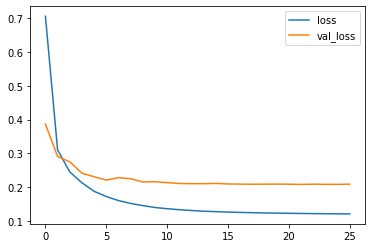

In [111]:
history = pd.DataFrame(classification_model.history.history)
history[['loss', 'val_loss']].plot()

<AxesSubplot:>

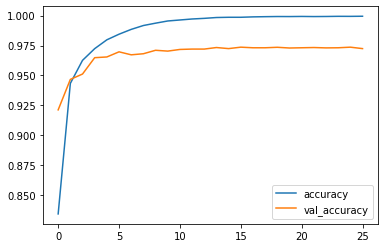

In [112]:
history = pd.DataFrame(classification_model.history.history)
history[['accuracy', 'val_accuracy']].plot()

### max of validation accuracy

In [113]:
np.max(history["val_accuracy"])

0.9735999703407288

## Evaluate the model

In [114]:
classification_model.evaluate(test_data, test_labels, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.1930 - accuracy: 0.9760


[0.19300347566604614, 0.9760000109672546]